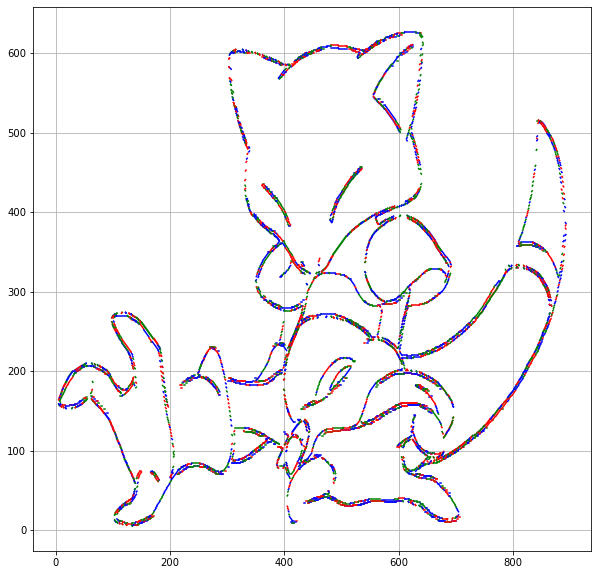

In [1]:
#LIBRARIES
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

#IMAGE PROCESSING
img = cv.imread(r"C:\\Users\\Jojo\\Downloads\\abra.jpg")
img = cv.flip(img, 0)
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edged = cv.Canny(imgray, 40, 200)
ret, thresh = cv.threshold(edged, 50, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
r = cv.drawContours(img, contours, -1, (0,255,0), 3)
#cv.imshow('img',r)
#cv.waitKey(0)
res = []
s = 0
for i in contours:
    if len(i)>3:
        res.append(i)
        s+=len(i)
r = cv.drawContours(img, res, -1, (0,255,0), 3)
#cv.imshow('img',r)
#cv.waitKey(0)


#PLOTTING
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
        

strs = []
pts = []
mb = []
for ele in res:
    x = []
    y = []
    for k in ele:
        x.append(k[0][0])
        y.append(k[0][1])
    if len(x)%2 == 1:
        x.pop()
    if len(y)%2 == 1:
        y.pop() 
    g = list(chunks(x,2))
    h = list(chunks(y,2))
    pts.append(tuple(x))
    pts.append(tuple(y))
    pts.append(random.choice(['r','g','b']))
    #pts.append
    for i in range(len(g)):
        try:
            m, b = np.polyfit(g[i], h[i], 1)
            st = 'y ='+str(m)+'*x+'+str(b)+'{'+str(min(h[i]))+'<y<'+str(max(h[i]))+'}'+'{'+str(min(g[i]))+'<x<'+str(max(g[i]))+'}'
            strs.append(st)
            mb.append([m, b, min(g[i]), max(g[i])])
        except:
            continue
        

      
plt.figure(figsize=(10, 10))
plt.grid()
for i in range(len(mb)):
    x = np.linspace(mb[i][2],mb[i][3],10)
    y = mb[i][0]*x+mb[i][1]
    plt.plot(x, y, random.choice(['r','g','b']))
    plt.grid()
plt.show()

In [2]:
#PRINTING EQUATIONS
strs

['y =-0.9999999999999122*x+138.99999999998832{5<y<6}{133<x<134}',
 'y =-1.0000000000000286*x+130.00000000000352{6<y<7}{123<x<124}',
 'y =-1.0000000000000464*x+124.00000000000533{7<y<8}{116<x<117}',
 'y =-0.9999999999999812*x+119.99999999999793{8<y<9}{111<x<112}',
 'y =-0.9999999999999576*x+116.9999999999955{9<y<10}{107<x<108}',
 'y =-1.000000000000007*x+115.00000000000068{10<y<12}{103<x<105}',
 'y =0.9999999999999911*x+-83.99999999999909{19<y<20}{103<x<104}',
 'y =0.9999999999999944*x+-81.99999999999943{22<y<26}{104<x<108}',
 'y =0.9999999999999886*x+-82.99999999999869{26<y<29}{109<x<112}',
 'y =0.9999999999999986*x+-83.99999999999984{29<y<31}{113<x<115}',
 'y =1.0000000000000049*x+-85.00000000000055{31<y<33}{116<x<118}',
 'y =1.0000000000000009*x+-87.0000000000001{33<y<35}{120<x<122}',
 'y =1.0000000000000249*x+-88.00000000000307{35<y<36}{123<x<124}',
 'y =1.000000000000002*x+-90.00000000000024{36<y<38}{126<x<128}',
 'y =0.99999999999998*x+-91.99999999999741{38<y<39}{130<x<131}',
 'y 